In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("saude.csv" , sep =";", decimal =",", encoding = "UTF-8")
df

,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE,TIPO,CATEGORIA
0,Rua General Carneiro 904,Centro,-25.430432,-49.259700,Ambulatório,Público
1,Alameda Nossa Senhora do Sagrado Coração 771,Pinheirinho,-25.527555,-49.291703,Centro de Atenção Psicossocial,Público
2,"Av, Iguaçu 3681",Seminário,-25.452428,-49.296142,Centro de Atenção Psicossocial,Público
3,Avenida Governador Jorge Lacerda 687,Vila Torres,-25.457860,-49.247716,Centro de Atenção Psicossocial,Público
4,"R, Carlos de Laet 6270",Boqueirão,-25.485159,-49.241467,Centro de Atenção Psicossocial,Público
...,...,...,...,...,...,...
169,Hospital Universitário Mackenzie,Bigorrilho,-25.434292,-49.292288,Hospital,Privado
170,Hospital VITA,Batel,-25.437680,-49.286889,Hospital,Privado
171,Hospital VITA Linha Verde,Bairro Alto,-25.407570,-49.217751,Hospital,Privado
172,Hospital Vitória,Cidade Industrial,-25.496578,-49.317944,Hospital,Privado


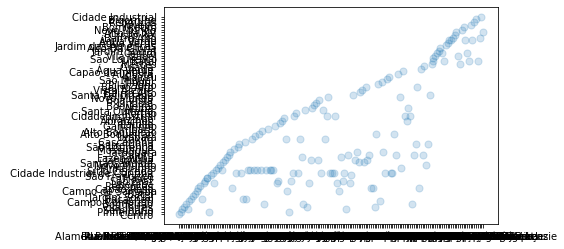

In [5]:
X = np.array(df)
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
               tiles='OpenStreet Map')
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row.LATITUDE, row.LONGITUDE],
        radius=5,
        color='#006400',
        fill=True,
        fill_colour='#006400'
    ).add_to(m)

m

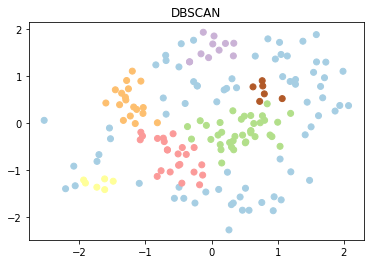

In [9]:
dados = pd.read_csv("saude.csv" , sep =";", decimal =",", encoding = "UTF-8")
dados = dados[['LATITUDE' , 'LONGITUDE']]

dados = np.array(dados)

def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    
dbscan(dados , .3 , 6)